In [0]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master

     | 3.6MB 2.3MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_5s6s0v/wheels/34/ca/91/c497716e284959a22c5e1063b0c6ea3edf535b3e0e503a1894
Successfully built data-science-utils
  Found existing installation: data-science-utils 0.2.28
    Uninstalling data-science-utils-0.2.28:
      Successfully uninstalled data-science-utils-0.2.28


In [3]:
# When using in colab, upload lib.py, in the left side pane open files and then click upload
from data_science_utils.vision.keras import *

Using TensorFlow backend.


In [0]:

X_train, Y_train, X_test, Y_test = get_mnist_data()

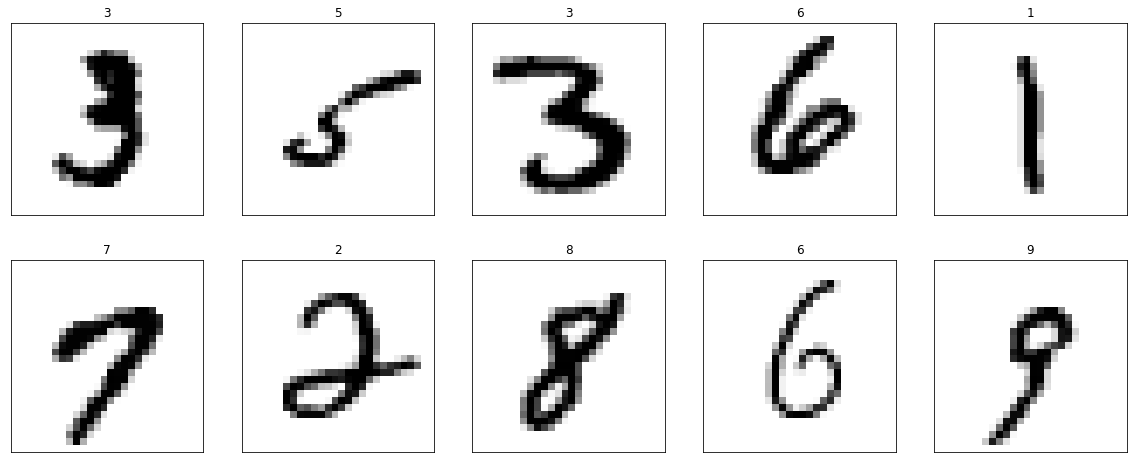

In [5]:
show_examples(X_train[10:20], Y_train[10:20],classes=get_mnist_labels())

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Params =  17402
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 1.8403 - acc: 0.4089
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.6875 - acc: 0.7737
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4159 - acc: 0.8681
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3025 - acc: 0.9048
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2448 - acc: 0.9244


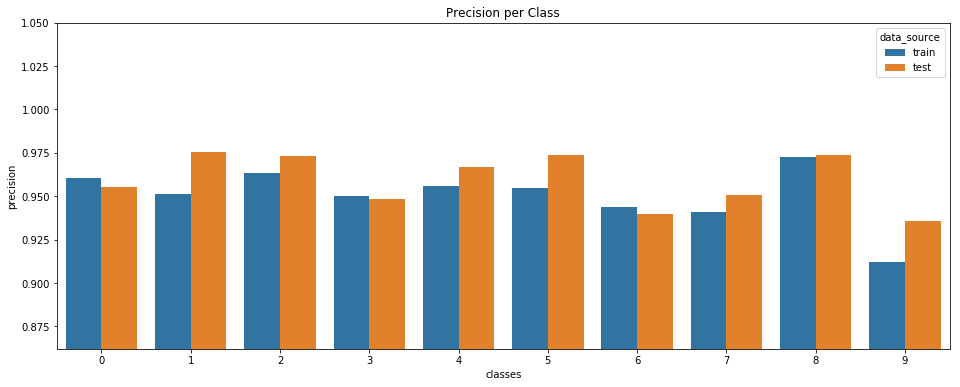

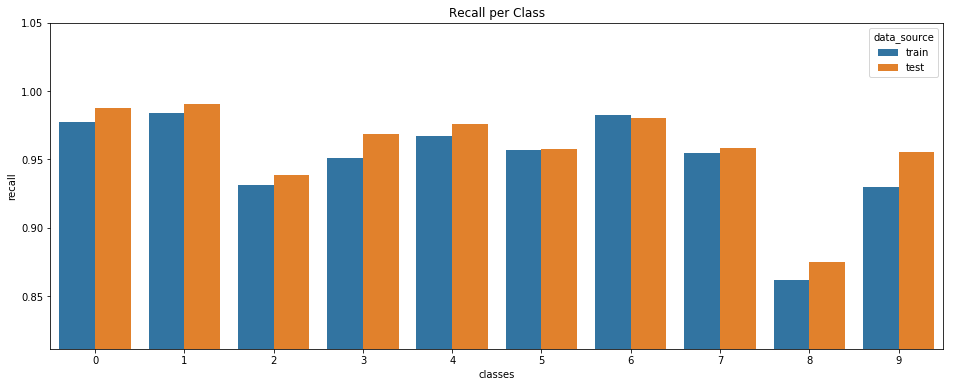

([0.1764857264260451, 0.9500333333333333],
 [0.15404907357096673, 0.9591],
   classes   average  precision    recall support data_source
 0       0      None   0.960345  0.977207    5923       train
 1       1      None   0.951104  0.983833    6742       train
 2       2      None   0.963542  0.931521    5958       train
 3       3      None   0.950122  0.950742    6131       train
 4       4      None   0.955676  0.966963    5842       train
 5       5      None   0.954713  0.956650    5421       train
 6       6      None   0.943849  0.982764    5918       train
 7       7      None   0.941130  0.954350    6265       train
 8       8      None   0.972790  0.861562    5851       train
 9       9      None   0.912104  0.929736    5949       train
 0       0      None   0.955577  0.987755     980        test
 1       1      None   0.975694  0.990308    1135        test
 2       2      None   0.972892  0.938953    1032        test
 3       3      None   0.948594  0.968317    1010        

In [7]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=2048, epochs=5, verbose=1)

evaluate(model,X_train, Y_train,X_test, Y_test,classes=get_mnist_labels())
